In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:

df = pd.read_csv('https://raw.githubusercontent.com/knmonishgh/dataset/main/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


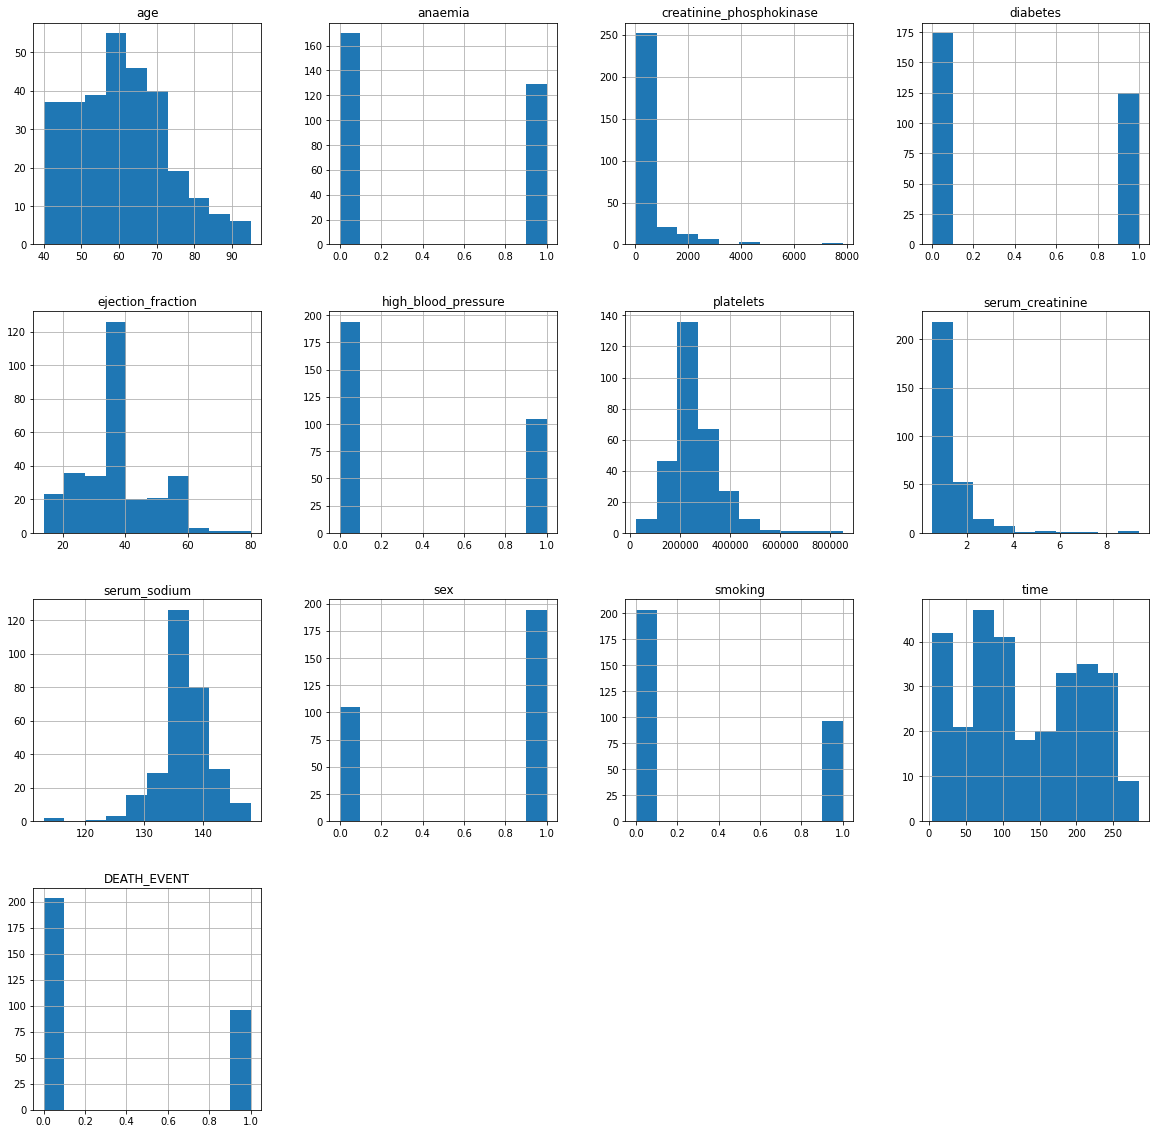

In [5]:
df.hist(figsize = (20,20))
plt.show()

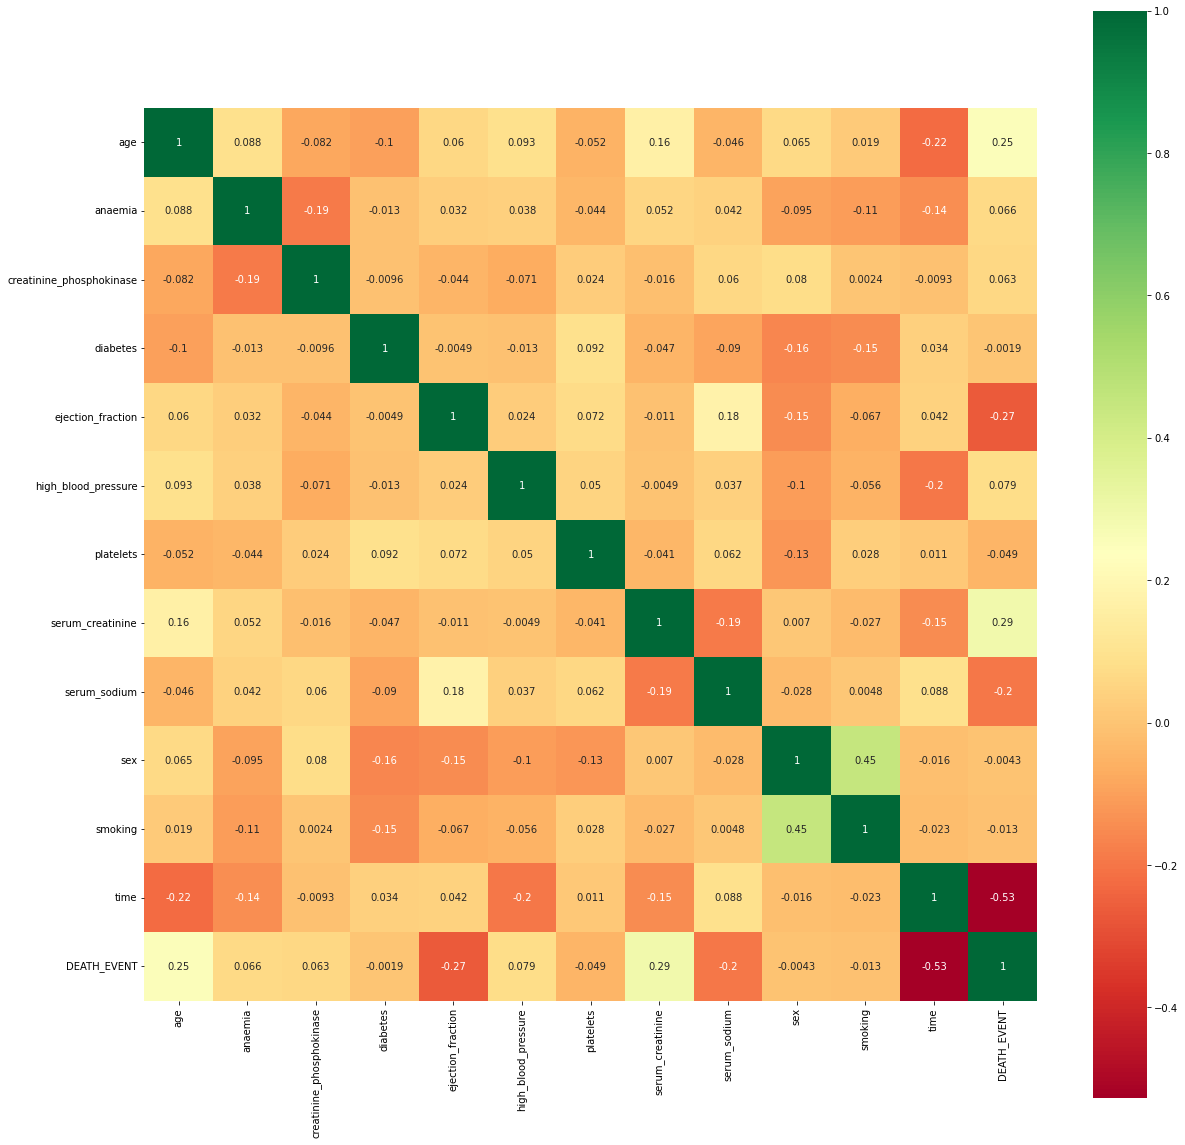

In [6]:
plt.figure(figsize=(20,20))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True) 

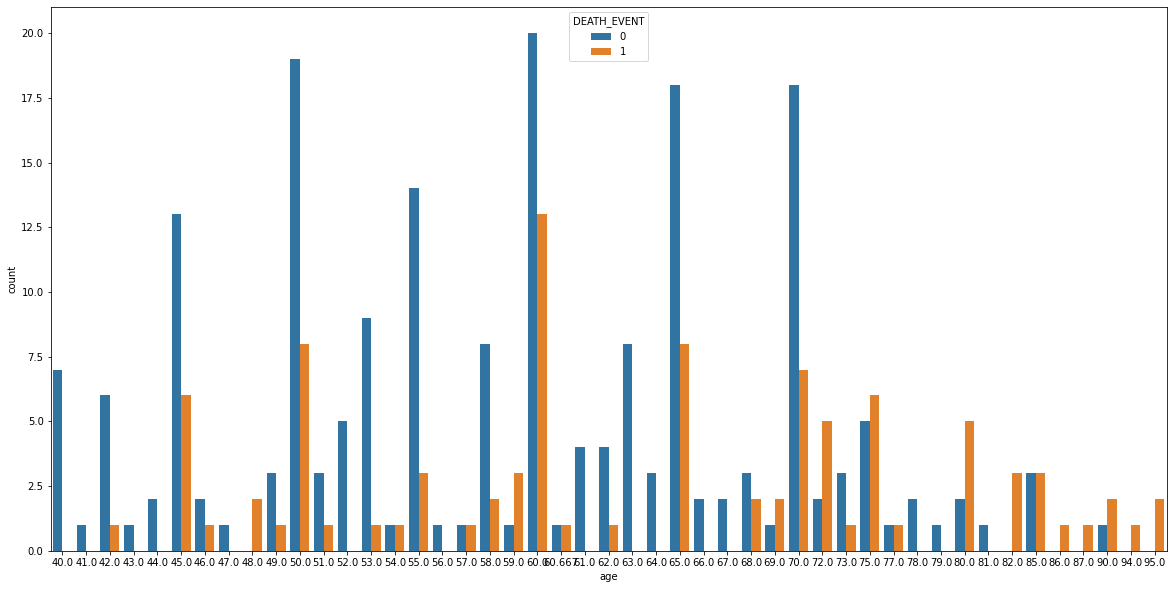

In [7]:
plt.figure(figsize=(20,10))
sns.countplot(x ="age", data=df, hue ="DEATH_EVENT");

In [8]:
X = np.array(df.drop(['DEATH_EVENT'], axis=1))
y = np.array(df['DEATH_EVENT'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(239, 12)
(60, 12)


In [10]:
#using Decision tree 


DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train, y_train)
y_pred = DT_clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [11]:
DT_clf.predict([[68,1,220,0,35,1,289000,0.9,140,1,1,20]])

array([1], dtype=int64)

In [12]:
KNN_clf = KNeighborsClassifier()
KNN_clf.fit(X_train, y_train)
y_pred = KNN_clf.predict(X_test)

In [13]:
KNN_clf.predict([[60,0,2656,1,30,0,305000,2.3,137,1,0,30]])

array([0], dtype=int64)

In [14]:
%%writefile app.py
#%%writefile - magic command to create a .py file(app is the name of .py file)
import streamlit as st
import joblib
model = joblib.load('spam-ham')
st.title('SPAM HAM CLASSIFIER')
ip = st.text_input('Enter the Message')
op = model.predict([ip])
if st.button('Predict'):
  st.title(op[0])

Overwriting app.py


In [38]:
!streamlit run app.py & npx localtunnel --port 8501

^C
